In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Задание 3.1
Вычислить площадь s, периметр р, ширину w, высоту h, отношение ширины к высоте w/h, отношение площади изображения к площади описывающего прямоугольника s/(wh), эквивалентный диаметр, центр масс, моменты бинарного изображения.

In [2]:
img = cv2.imread('cat.jpg', 0)
imag = cv2.imread('cat.jpg', 0)
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

У функции findContours два возвращаемых значения: первое – контур, а второе – топологическая структура (иерархия). Контур (первое возвращаемое значение) – это список, в котором хранятся все контуры изображения. Каждый контур пред-
ставляет собой массив numpy, содержащий координаты точек границы объекта (x, y).

In [3]:
ar = cv2.contourArea(cnt)
print(f"Площадь: {ar}")

prm = cv2.arcLength(cnt,True)
print(f"Периметр: {prm}")

M = cv2.moments(cnt)
print(f"Моменты: {M}")

x,y,w,h = cv2.boundingRect(cnt)
print(f"{x}, {y}, Ширина: {h}, высота: {w}")

imag = cv2.rectangle(imag,(x,y),(x+w,y+h),(0,255,0),2)
asprat = float(w) / h 
rectar = w * h
extent = float(ar)/rectar
eqdiam = np.sqrt(4 * ar / np.pi)
print(f"Отношение ширины к высоте: {asprat}, отношение s/(wh): {extent}")
print(f"Эквивалентный диаметр: {eqdiam}")

Площадь: 487153.0
Периметр: 2812.0
Моменты: {'m00': 487153.0, 'm10': 150773853.5, 'm01': 191694705.5, 'm20': 62219343544.33333, 'm11': 59329511352.25, 'm02': 100575822152.33333, 'm30': 28885330240456.75, 'm21': 24483311684695.168, 'm12': 31128216956147.168, 'm03': 59364879025414.75, 'mu20': 15554835886.083328, 'mu11': 7.62939453125e-06, 'mu02': 25143955538.083344, 'mu30': 0.00390625, 'mu21': 0.0, 'mu12': -0.001953125, 'mu03': 0.0078125, 'nu20': 0.06554426090639556, 'nu11': 3.214839612428673e-17, 'nu02': 0.10595045772751753, 'nu30': 2.3582865888070658e-17, 'nu21': 0.0, 'nu12': -1.1791432944035329e-17, 'nu03': 4.7165731776141315e-17}
0, 0, Ширина: 788, высота: 620
Отношение ширины к высоте: 0.7868020304568528, отношение s/(wh): 0.9971201080727035
Эквивалентный диаметр: 787.5674345326682


# Задание 3.2
Используя изображение маски определить крайние точки, минимальное и максимальное значения и их координаты для бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью.

Пиксельные точки:
 [[  0   0]
 [  0   1]
 [  0   2]
 ...
 [787 617]
 [787 618]
 [787 619]]
Макс. и мин. значения и их координаты: 6.0, 255.0, (402, 125), (427, 51)
Крайние точки:(0, 0), (619, 0), (0, 0), (619, 787)
Средняя интенсивность: (153.94533527100052, 0.0, 0.0, 0.0)
Ориентация: 0.0


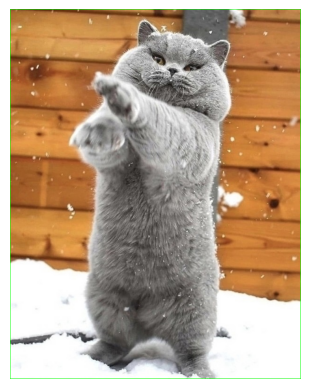

In [4]:
img = cv2.imread('cat.jpg', 0)
imag = cv2.imread('cat.jpg', 1)
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]
cv2.drawContours(imag, contours, -1, (0,255,0), 1)

mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, contours, 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)
meanv = cv2.mean(img,mask = mask)

print(f"Пиксельные точки:\n {pixpoin}")
print(f"Макс. и мин. значения и их координаты: {minv}, {maxv}, {minl}, {maxl}")
print(f"Крайние точки:{leftmost}, {rightmost}, {topmost}, {bottommost}")
print(f"Средняя интенсивность: {meanv}")
print(f"Ориентация: {ang}")

plt.axis("off")
plt.imshow(cv2.cvtColor(imag,cv2.COLOR_BGR2RGB))